## EDA Patornes de sueño en estudiantes universitarios

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Recupero el csv
ruta = 'student_sleep_patterns.csv' 
csv = pd.read_csv(ruta, sep=',')
csv

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [3]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


No tengo valores nulos

Creo dos columnas nuevas que reflejen la duración del sueño en los días de diario y en fin de semana en vez de tener las columnas de (weekend_sleep_start / weekend_sleep_end y weekday_sleep_start / weekday_sleep_end)

In [4]:
csv['Weekend_Sleep_Duration']=abs(csv['Weekend_Sleep_End']-csv['Weekend_Sleep_Start'] )
csv['Weekday_Sleep_Duration'] =abs(csv ['Weekday_Sleep_End']- csv['Weekday_Sleep_Start'] )

Elimino las columnas que ya no me van a hacer falta

In [5]:
csv.drop(columns=['Student_ID','Weekend_Sleep_Start','Weekend_Sleep_End','Weekday_Sleep_Start','Weekday_Sleep_End'],inplace=True)

In [6]:
csv.head()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekend_Sleep_Duration,Weekday_Sleep_Duration
0,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,3.01,6.75
1,21,Male,1st Year,6.3,6.0,1.9,5,74,2,3.11,0.52
2,22,Male,4th Year,5.1,6.7,3.9,5,53,5,9.55,13.12
3,24,Other,4th Year,6.3,8.6,2.8,4,55,9,5.34,13.13
4,20,Male,4th Year,4.7,2.7,2.7,0,85,3,2.89,12.00


<Axes: >

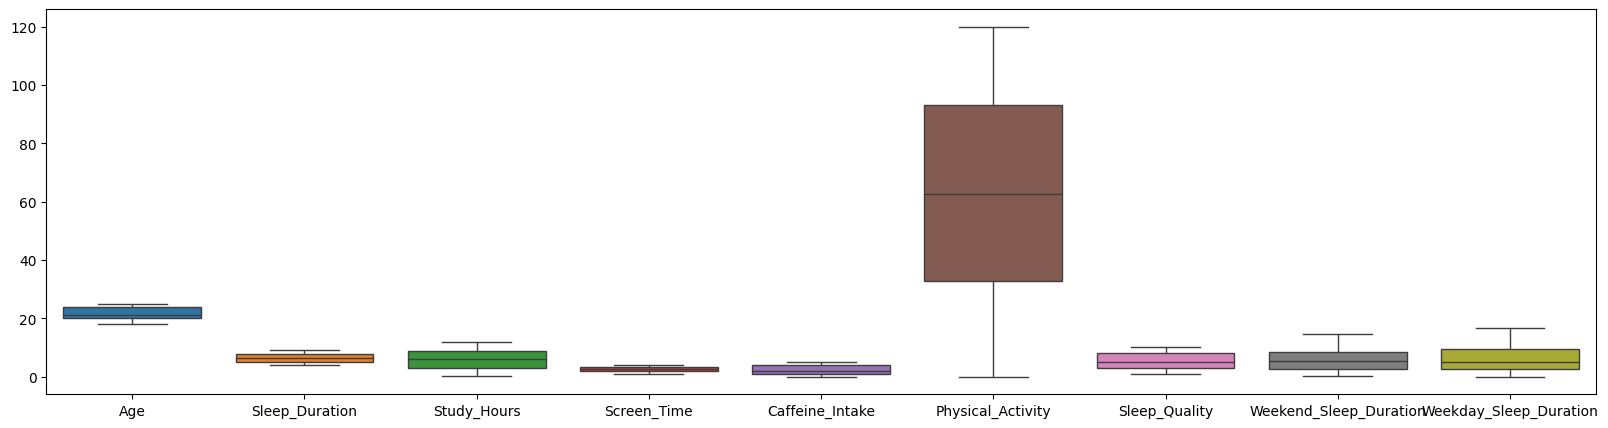

In [7]:
plt.figure(figsize=(20,5))
sns.boxplot(csv)


Hago una media sobre la calidad de sueño según la edad de cada estudiante para sacar un gráfico que me indique que edades tienen la mejor media de sueño y la peor


<Axes: xlabel='Age', ylabel='Sleep_Quality'>

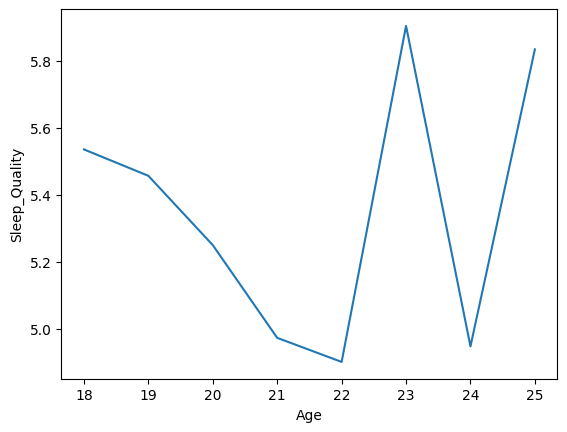

In [8]:
csv1 =csv.groupby("Age").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='Age',y='Sleep_Quality',data=csv1)

Podemos observar que la mejor media la tienen los estudiantes de 23 años, luego hay un curioso pico a la hacia abajo a los 24 y a los 25 vuelve a subir la media exponencialmente

<Axes: xlabel='Gender', ylabel='Sleep_Quality'>

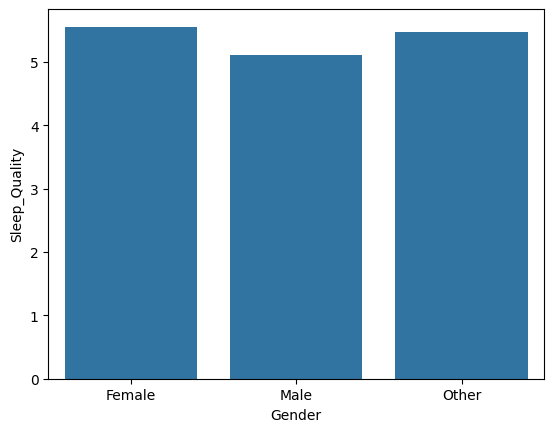

In [9]:
#Hago la media según el genero y la calidad del sueño

csv1 =csv.groupby("Gender").agg({"Sleep_Quality":"mean"}).reset_index()
sns.barplot(x='Gender',y='Sleep_Quality',data=csv1)

Se observa la peor calidad de sueño en hombres y la mejor en mujeres

<Axes: xlabel='University_Year', ylabel='Sleep_Quality'>

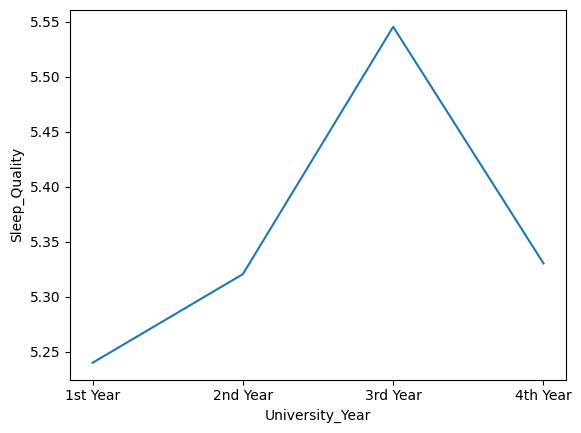

In [10]:
csv1 =csv.groupby("University_Year").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='University_Year',y='Sleep_Quality',data=csv1)


In [11]:
csv2 = csv.groupby("University_Year").agg({"Caffeine_Intake":"mean", "Sleep_Quality":"mean", "Sleep_Duration":"mean", "Study_Hours":"mean", "Screen_Time":"mean"}).reset_index()
csv2 = csv2.round(2)
csv2


,University_Year,Caffeine_Intake,Sleep_Quality,Sleep_Duration,Study_Hours,Screen_Time
0,1st Year,2.61,5.24,6.49,5.80,2.45
1,2nd Year,2.39,5.32,6.56,6.08,2.60
2,3rd Year,2.38,5.55,6.49,6.43,2.45
3,4th Year,2.48,5.33,6.32,5.53,2.61


<Axes: xlabel='University_Year', ylabel='Caffeine_Intake'>

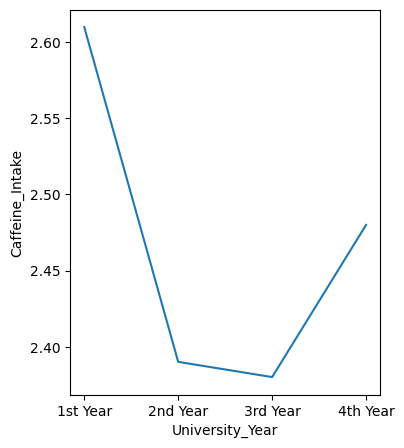

In [12]:
plt.figure(figsize=(4,5))
sns.lineplot(x="University_Year",y="Caffeine_Intake",data=csv2)


<Axes: title={'center': 'Relación entre tiempo frente a pantallas y métricas de sueño'}, xlabel='Sleep_Quality', ylabel='Value'>

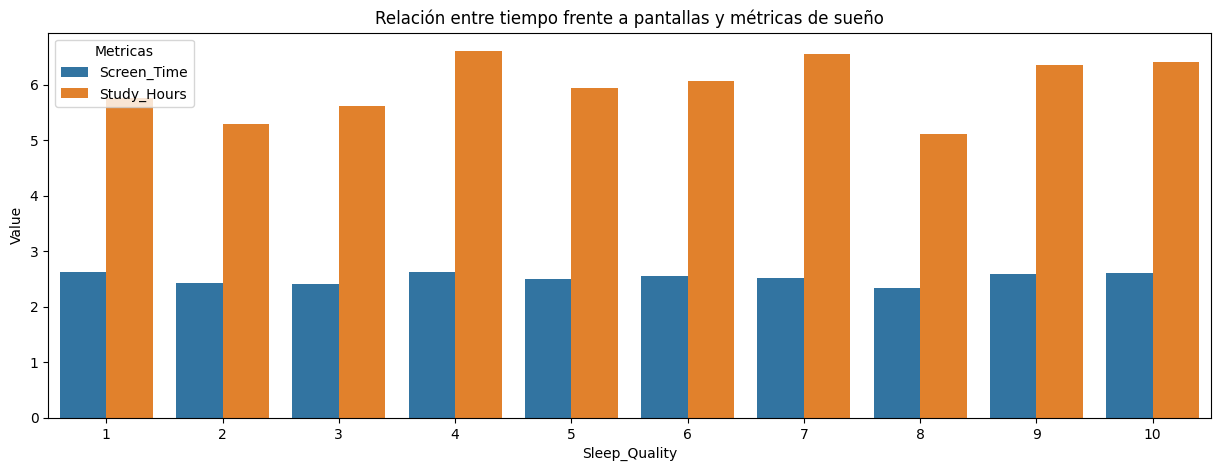

In [13]:
plt.figure(figsize=(15,5))

csv3 = csv.groupby("Sleep_Quality").agg({"Screen_Time": "mean", "Study_Hours": "mean"}).reset_index()


csv_long = csv3.melt(id_vars="Sleep_Quality", 
                     value_vars=["Screen_Time", "Study_Hours"], 
                     var_name="Metricas", 
                     value_name="Value")


plt.title("Relación entre tiempo frente a pantallas y métricas de sueño")
sns.barplot(x='Sleep_Quality', y='Value', hue='Metricas', data=csv_long)





Podemos observar que el tiempo frente a las pantallas no afecta significativamente a la calidad del sueño ni a la duracion de este


<Axes: xlabel='Physical_Activity', ylabel='Sleep_Quality'>

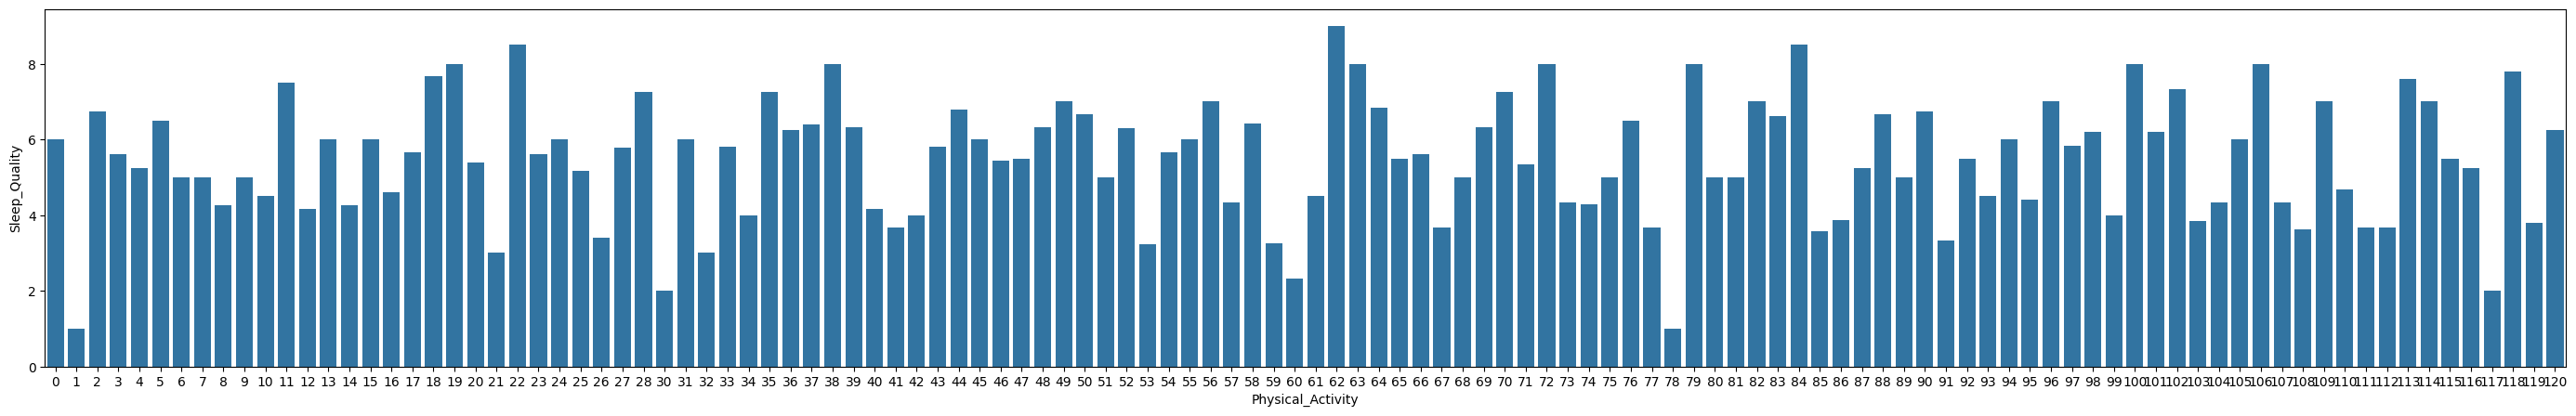

In [14]:
plt.figure(figsize=(35,5))

csv3 =csv.groupby("Physical_Activity").agg({"Sleep_Quality":"mean"}).reset_index()
sns.barplot(x='Physical_Activity',y='Sleep_Quality',data=csv3)

Se observa que la actividad física no tiene un impacto en la calidad del sueño

<Axes: xlabel='Caffeine_Intake', ylabel='Sleep_Quality'>

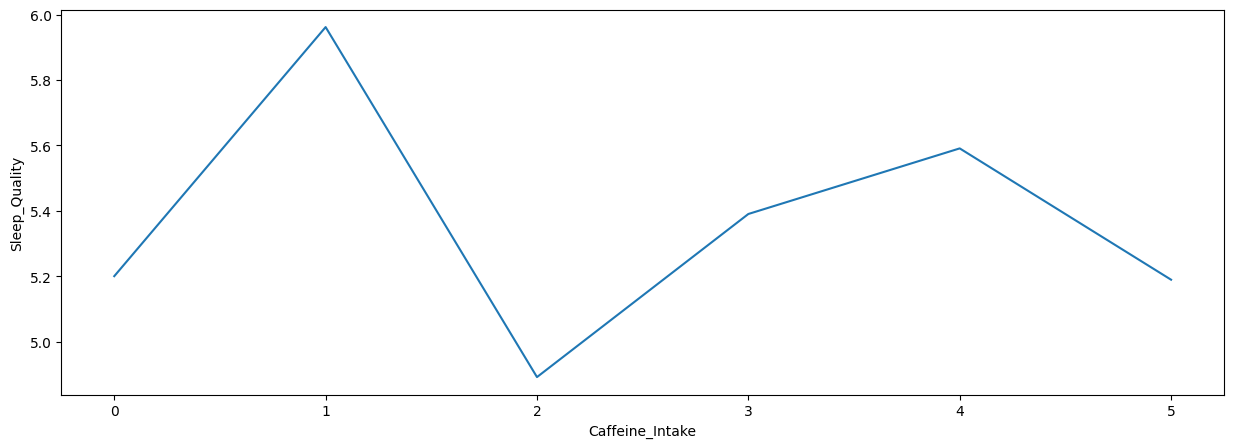

In [15]:
csv4 =csv.groupby("Caffeine_Intake").agg({"Sleep_Quality":"mean"}).reset_index()

plt.figure(figsize=(15,5))

sns.lineplot(x='Caffeine_Intake',y='Sleep_Quality',data=csv4)

Podemos ver que a partir de 1 bebida cafeinada la calidad del sueño disminuye, esto lo he interpretado entendiendo que cuantas más bebidas con cafeina se tome peor será la calidad del sueño, sin embargo hay unos valores que me sorprendieron.
<br><br>
Por ejemplo, que a 0 bebidas la media de la calidad del sueño sea de las peores. Intenté averiguar porque sucedia esto y no encontré ningun factor determinante.


También me llamó la atención la subida de la media de la calidad del sueño de 2 a 3 y a 4 bebidas cafeinadas, de nuevo intenté hayar un factor determinante como la actividad física que realizaban las personas que tomaban estas cantidades de cafeina pero no encontré ningun dato que explicará porque sucedia esto, asique lo interpreto como casualidad

### Conclusiones finales:

 - Los estudiantes de 22 y 24 años son los que peor calidad de sueño tienen
 - La mejor calidad de sueño la tienen las estudiantes de genero femenino, y la peor las de género masculino
 - Los estudiantes de primer curso son los que peor duermen, al contrario de los de tercero que son los que cuentan con la mejor calidad de sueño
 - El tiempo frente a pantallas, las horas de estudio y la actividad física no suponen un impacto importante en la calidad del sueño
 - Lo que más afecta a la calidad del sueño es el consumo de bebidas con cafeína, se puede interpretar que, a mayor consumo de estas, peor es la calidad del sueño.
